# Use AutoML to Predict Advertising Media Channel Sales


## Introduction
Our use case is to build, train, and evaluate a prediction model for sales analysis.

In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales. For designing the model, the machine learning method I opted for is simple linear regression, and the programming was done in Jupyter notebook.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

# Step 1: Data Preparation

### Import Libraries

In [1]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
from scipy import stats
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense


#from keras.callbacks import EarlyStopping


In [2]:
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/gstripling00/introduction_to_neural_networks/blob/Datasets/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [3]:
import os

if not os.path.isdir("/content/data"):
    os.makedirs("/content/data")

In [4]:
!head /content/data/advertising.csv

head: cannot open '/content/data/advertising.csv' for reading: No such file or directory


In [5]:
advertising_df.to_csv('/content/data/advertising.csv', encoding='utf-8', index=False)

In [6]:
advertising_df.head(10)

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
6,13.05,8.7,48.9,75.0,7.2
7,86.25,57.5,32.8,23.5,11.8
8,180.30,120.2,19.6,11.6,13.2
9,12.90,8.6,2.1,1.0,4.8
10,299.70,199.8,2.6,21.2,10.6


In [7]:
advertising_df.info()                                            # Pandas info() function is used to get a concise summary of the dataframe.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [8]:
advertising_df.describe()                                                      ### Get summary of statistics of the data


,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [9]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [10]:
advertising_df.isnull().sum()                 # The isnull() method is used to check and manage NULL values in a data frame.


digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
advertising_df.isnull().values.any()     #check there are any NAN values


False

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

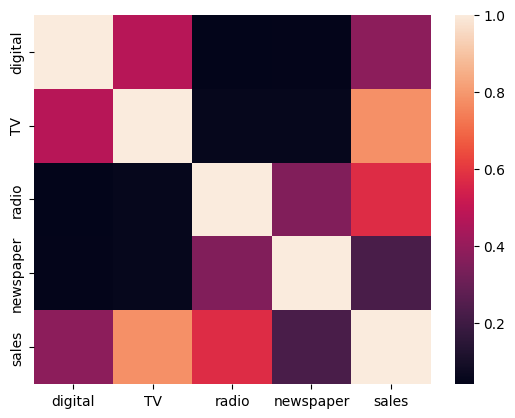

In [12]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(advertising_df.corr())

<Axes: >

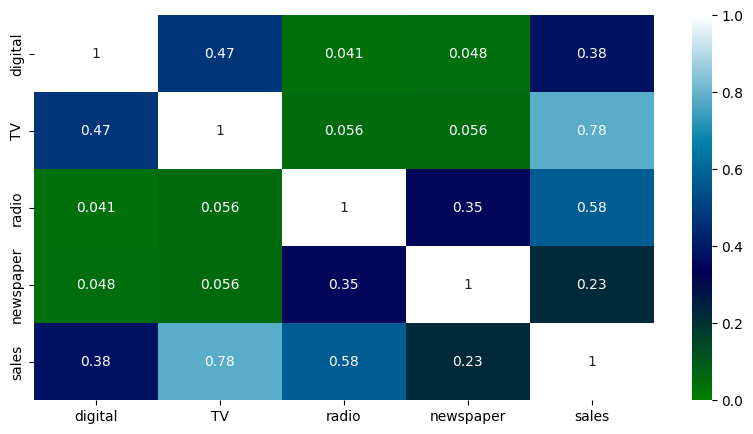

In [13]:
## Another option is to plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


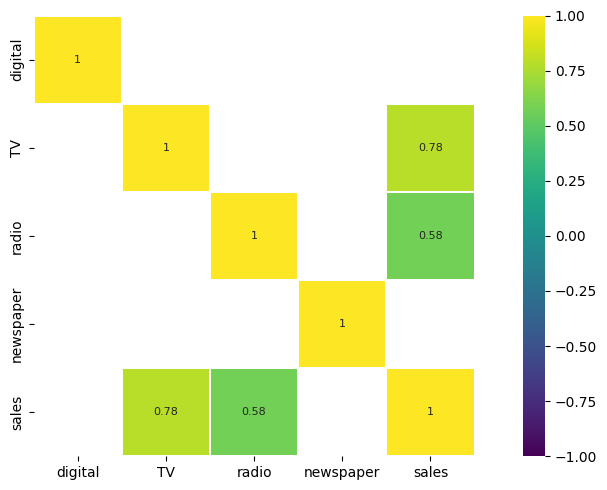

None

In [14]:
#create a correlation matrix
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [15]:
corr

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<ipython-input-16-6c77a4103e7b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(advertising_df.corr(), dtype=np.bool)


<Axes: >

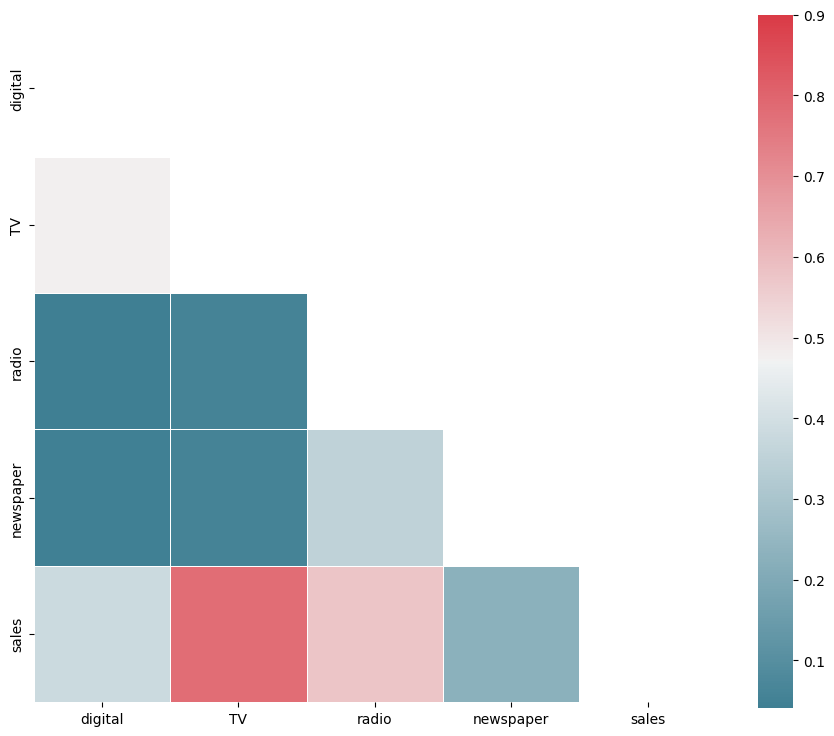

In [16]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

<Axes: xlabel='[digital]', ylabel='sales'>

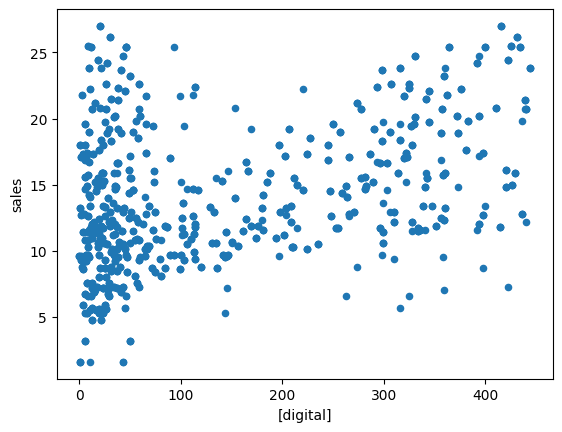

In [17]:
                                                                                #Scatter Plot
advertising_df.plot(kind='scatter', x=['digital'], y='sales')

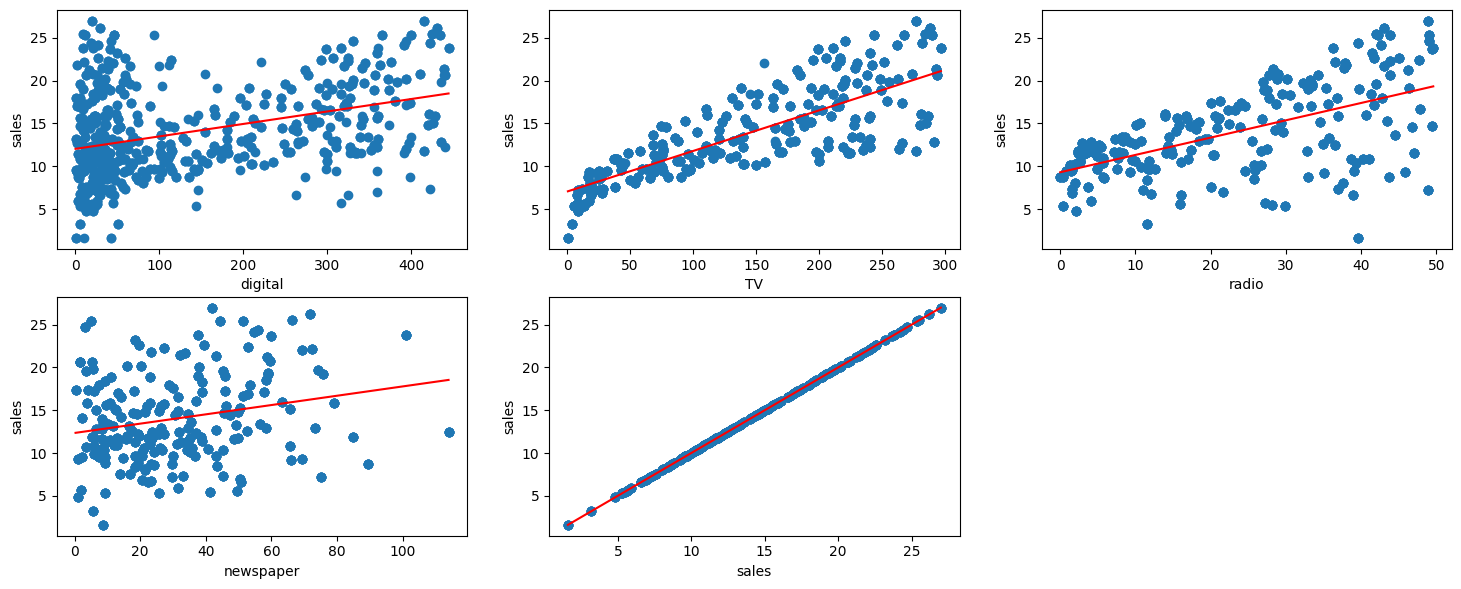

In [51]:
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label

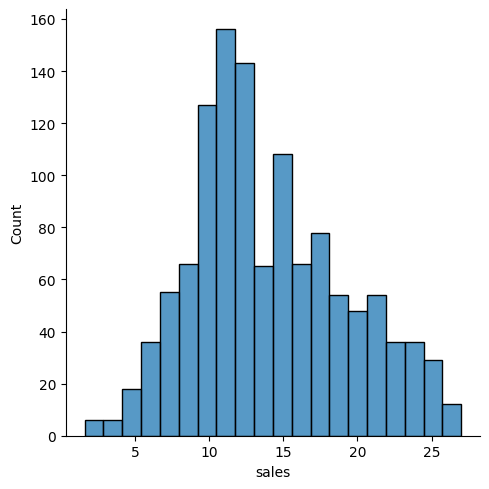

In [63]:
sns.displot(advertising_df, x="sales")

<ipython-input-64-5f6339af2255>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index)
<ipython-input-64-5f6339af2255>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_df[i])
<ipython-input-64-5f6339af2255>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code

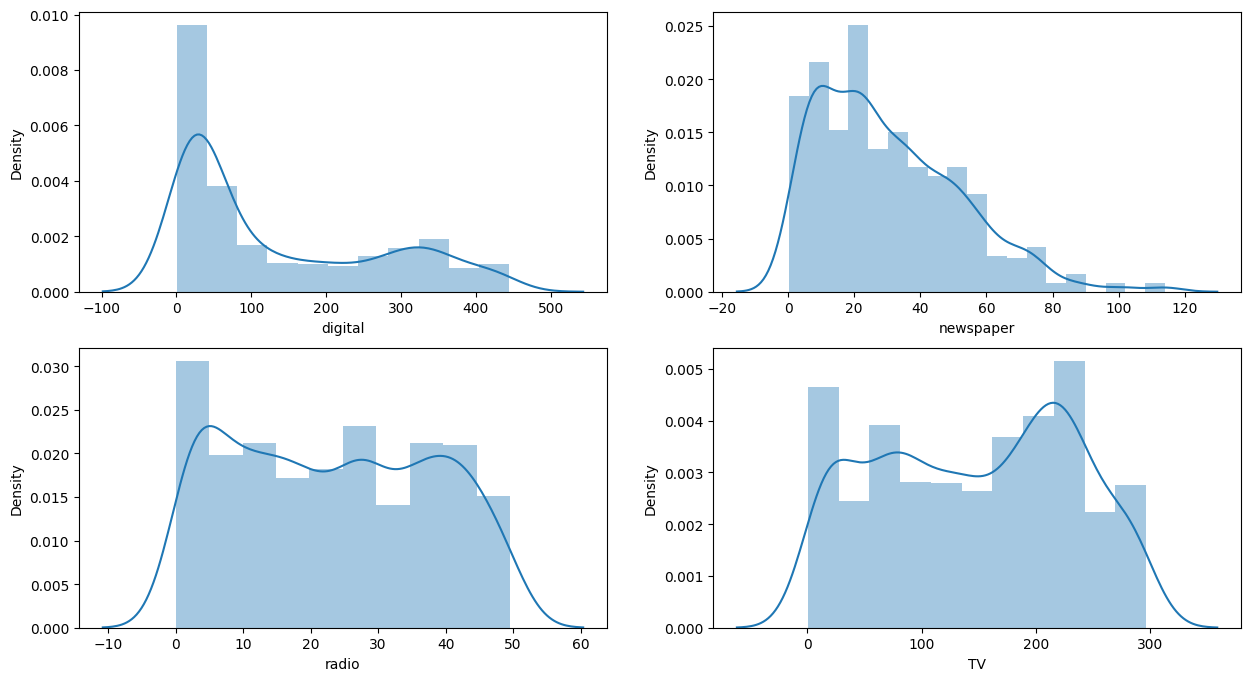

In [64]:
lis = ['digital', 'newspaper', 'radio','TV']
plt.subplots(figsize=(15, 8))
index = 1
for i in lis:
    plt.subplot(2, 2, index)
    sns.distplot(advertising_df[i])
    index += 1


#EXPORT THE ADVERTISING DATASET



In [66]:
import os
if not os.path.isdir("/content/data"):
    os.makedirs("/content/data")

In [67]:
!head /content/data/advertising.csv

digital,TV,radio,newspaper,sales
345.15,156.0,37.8,69.2,22.1
66.75,46.0,39.3,45.1,10.4
25.8,18.3,45.9,69.3,9.3
227.25,145.1,41.3,58.5,18.5
271.2,165.2,10.8,58.4,12.9
13.05,8.7,48.9,75.0,7.2
86.25,57.5,32.8,23.5,11.8
180.3,120.2,19.6,11.6,13.2
12.9,8.6,2.1,1.0,4.8


<ipython-input-18-59191d89c5a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_df['sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


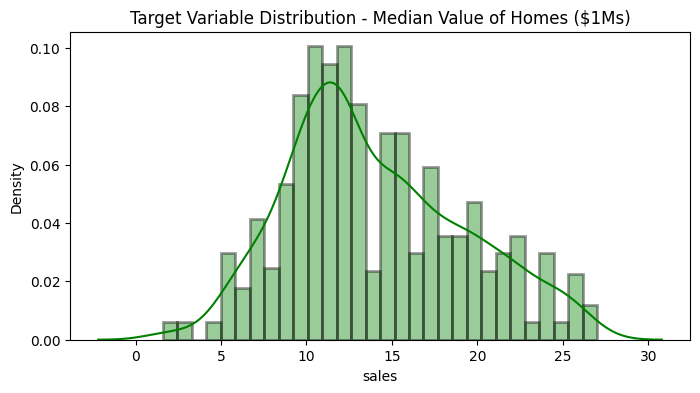

In [18]:
# Analyze the distribution of the target variable.

plt.figure(figsize=[8,4])
sns.distplot(advertising_df['sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Since Sales is our target variable, we should identify which variable correlates the most with Sales.

As we can see, TV has the highest correlation with Sales.
Let's visualize the relationship of variables using scatterplots.

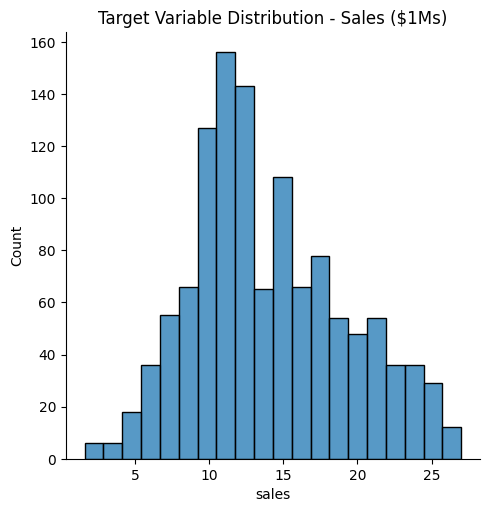

In [19]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(advertising_df['sales'])
plt.title('Target Variable Distribution - Sales ($1Ms)')
plt.show()

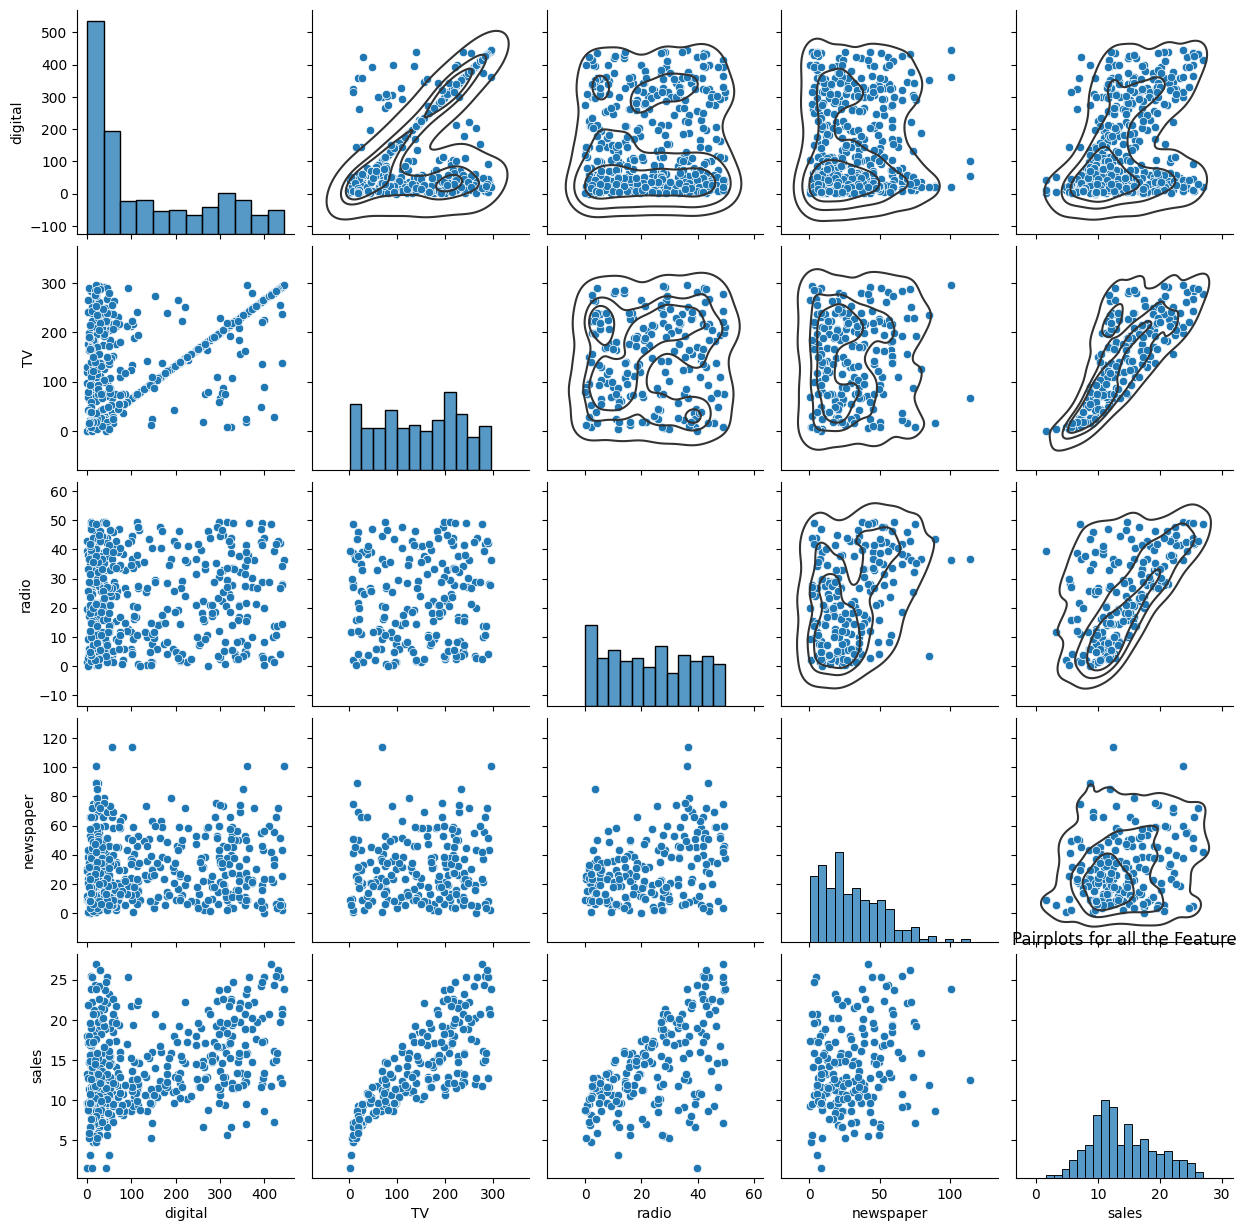

In [20]:
g = sns.pairplot(advertising_df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

# Inference: We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

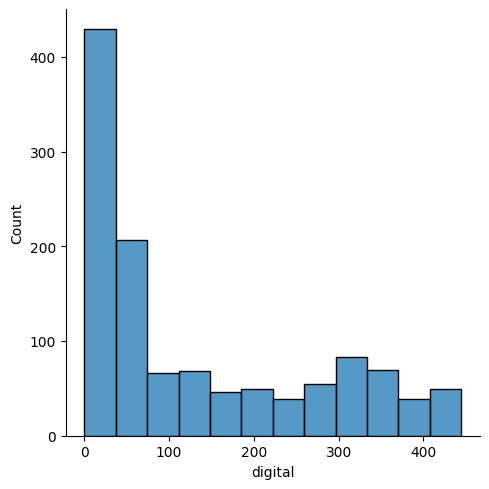

In [21]:
sns.displot(advertising_df['digital'])

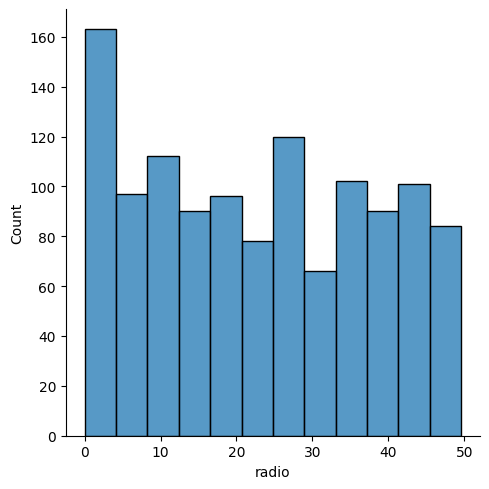

In [22]:
sns.displot(advertising_df['radio'])

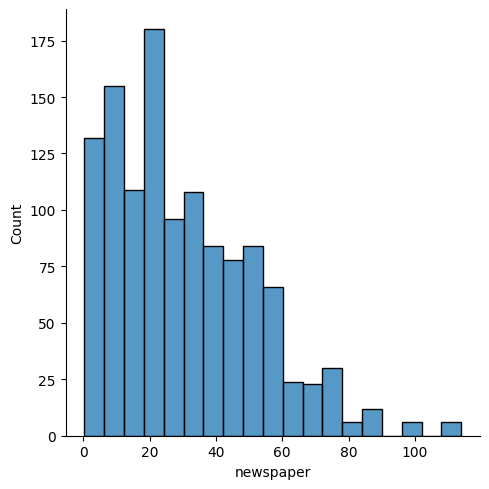

In [23]:
sns.displot(advertising_df['newspaper'])

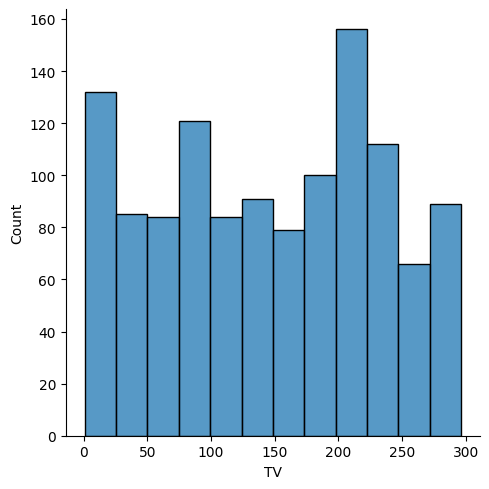

In [24]:
sns.displot(advertising_df['TV'])

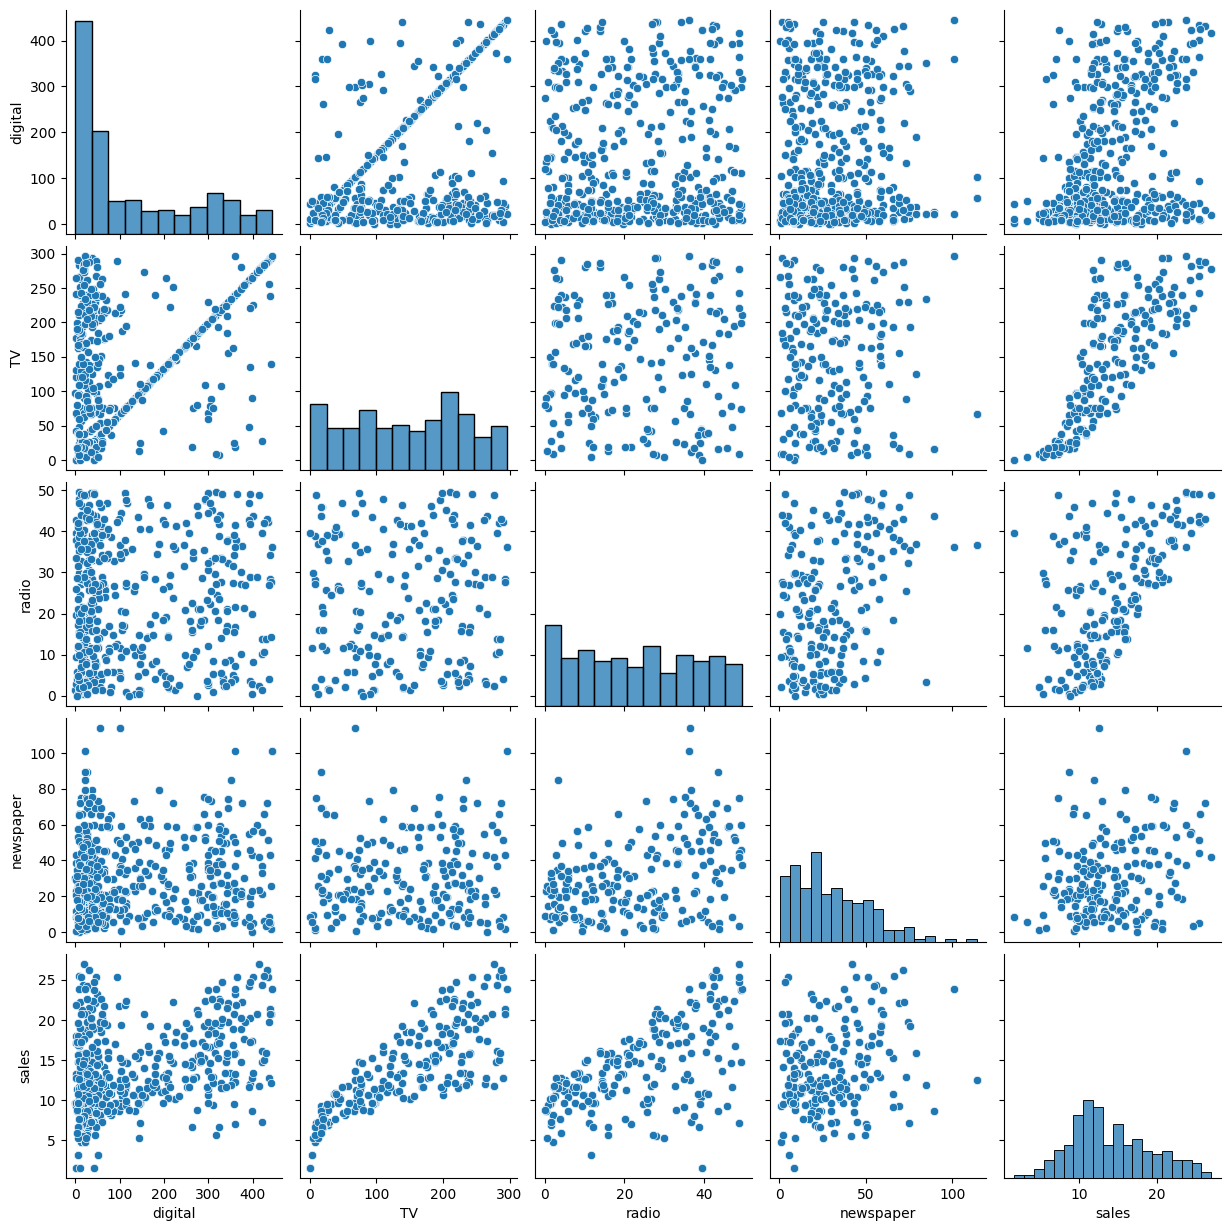

In [25]:
 sns.pairplot(advertising_df)

Let's visualize the relationship of variables using scatterplots. -- Separtely

Text(0.5, 1.0, 'Sales vs Newspaper')

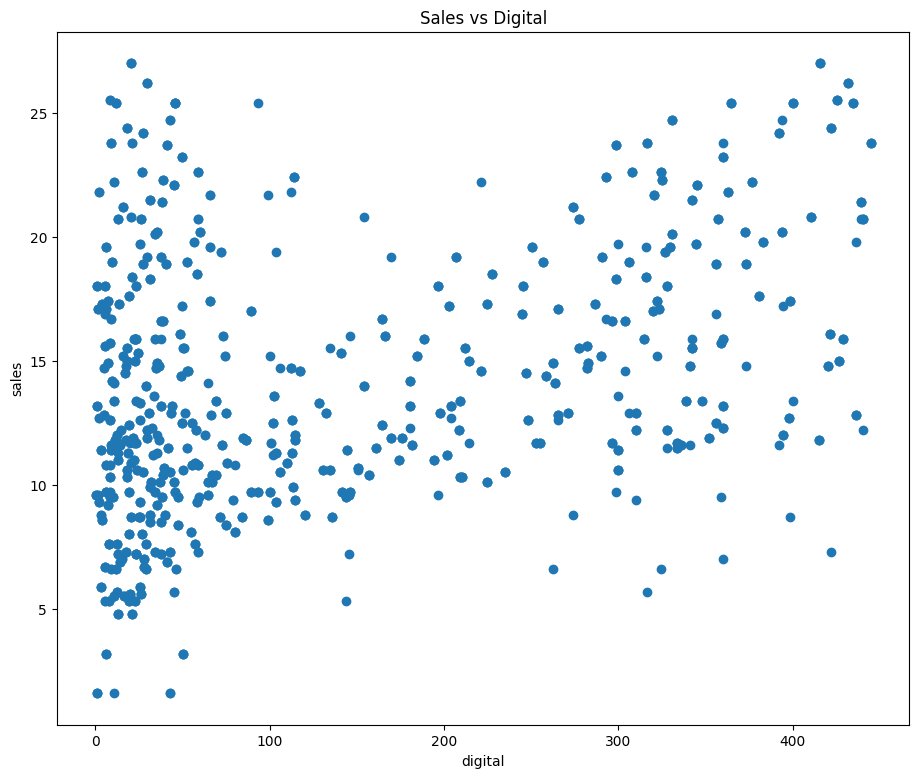

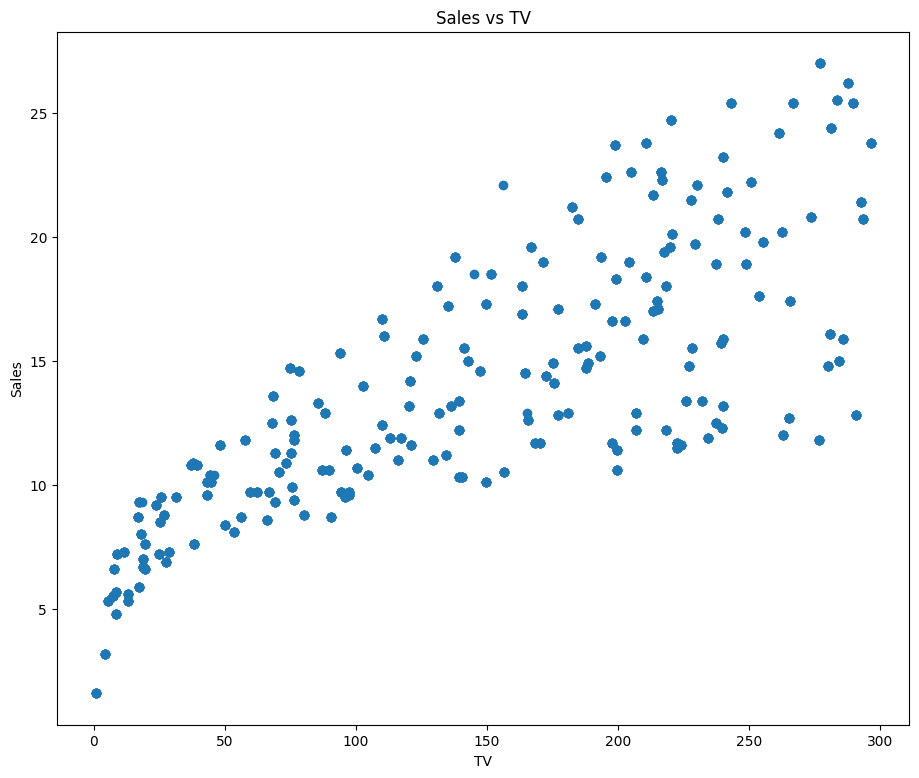

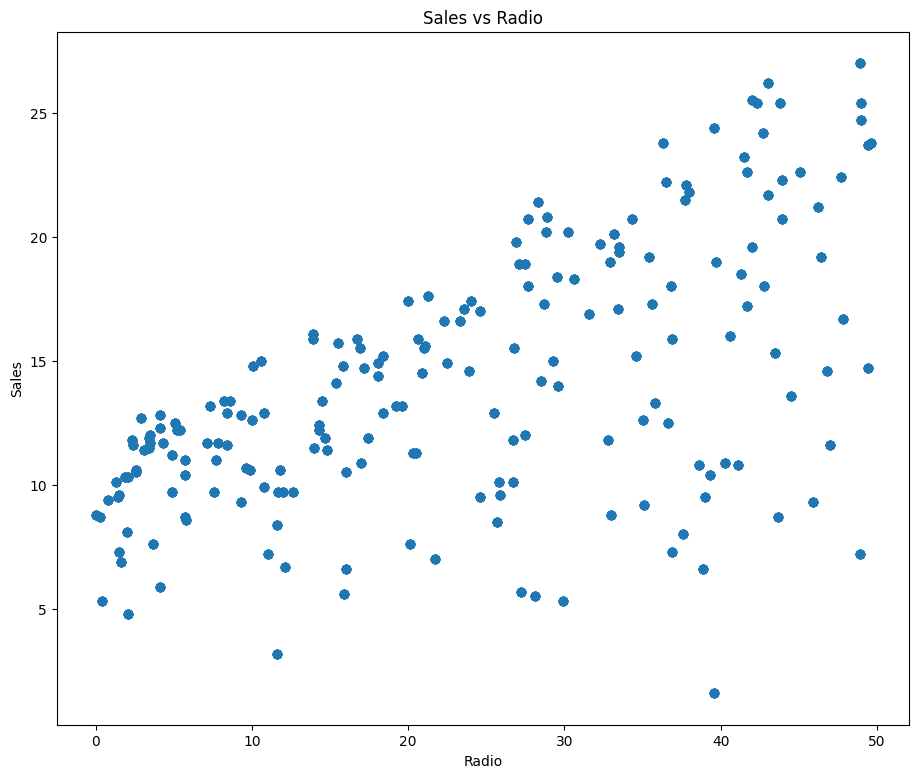

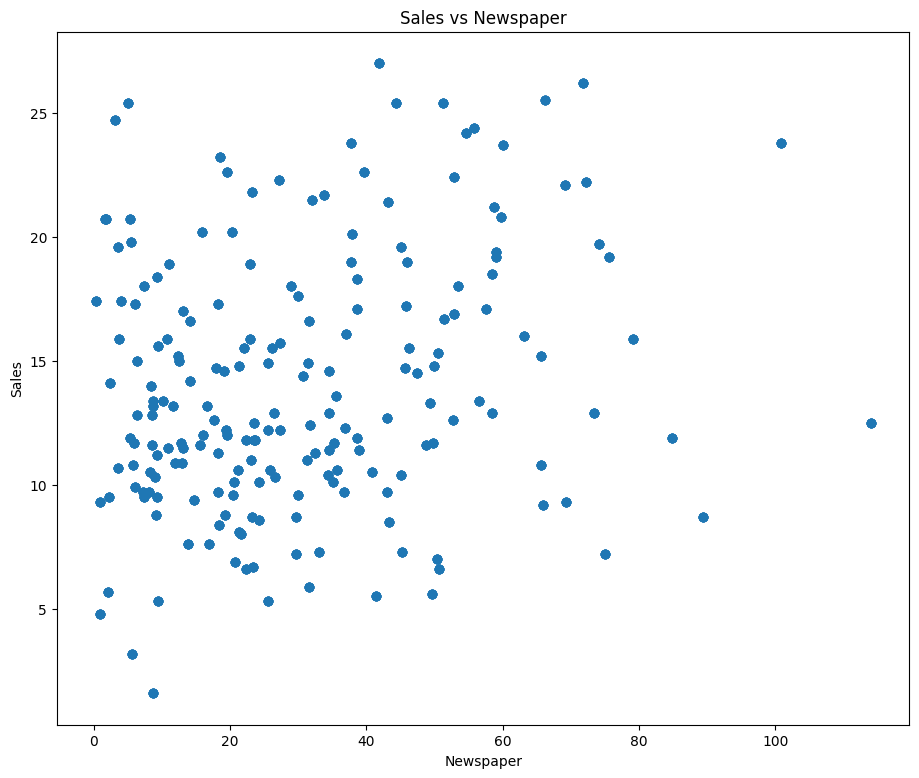

In [26]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising_df["digital"], advertising_df["sales"])
plt.xlabel("digital")
plt.ylabel("sales")
plt.title("Sales vs Digital")


f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising_df["TV"], advertising_df["sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising_df["radio"], advertising_df["sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising_df["newspaper"], advertising_df["sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Newspaper")

<Axes: xlabel='[newspaper]', ylabel='sales'>

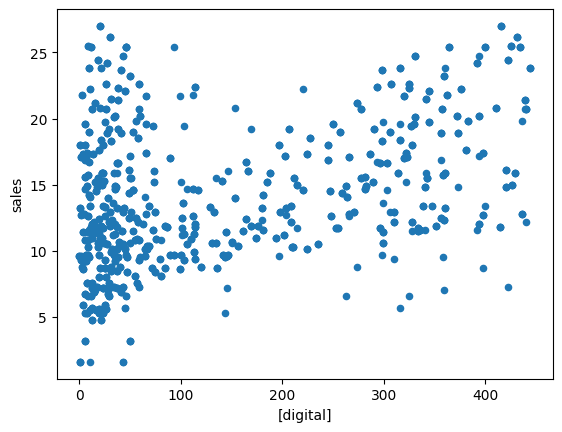

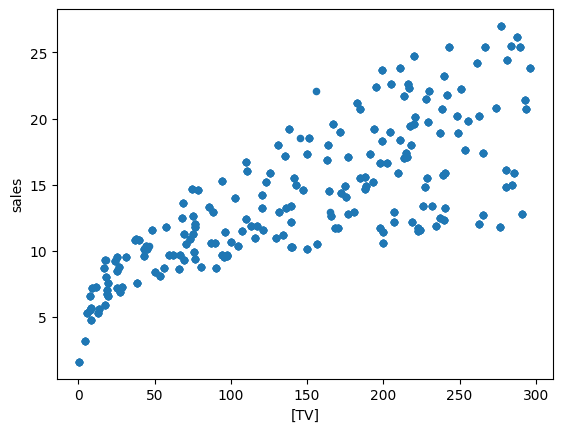

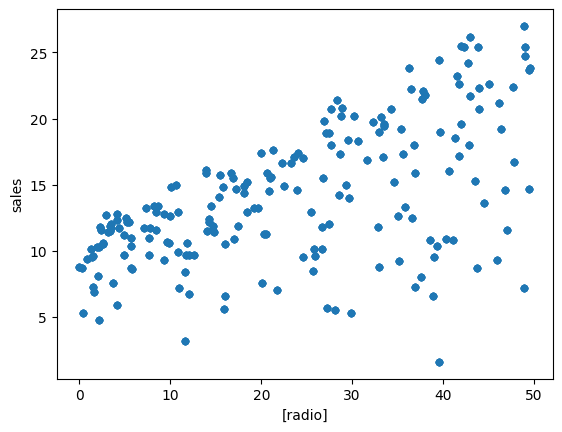

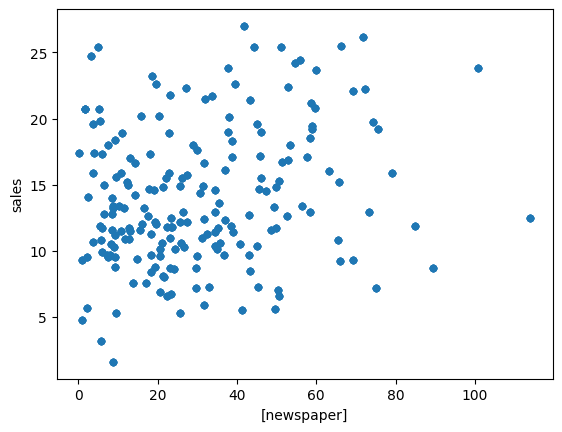

In [27]:
advertising_df.plot(kind='scatter', x=['digital'], y='sales')

advertising_df.plot(kind='scatter', x=['TV'], y='sales')

advertising_df.plot(kind='scatter', x=['radio'], y='sales')

advertising_df.plot(kind='scatter', x=['newspaper'], y='sales')

<Axes: xlabel='[digital]', ylabel='sales'>

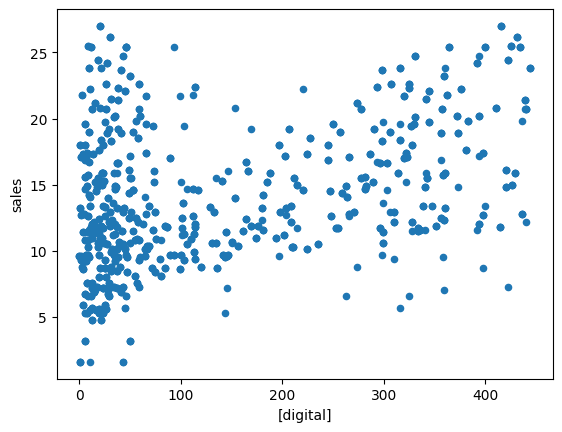

In [28]:
advertising_df.plot(kind='scatter', x=['digital'], y='sales')

Another way to view the linear relationsips between variables is to use a "for loop" that does the same as above.

It seems there's no clear linear relationships between the predictors.

At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

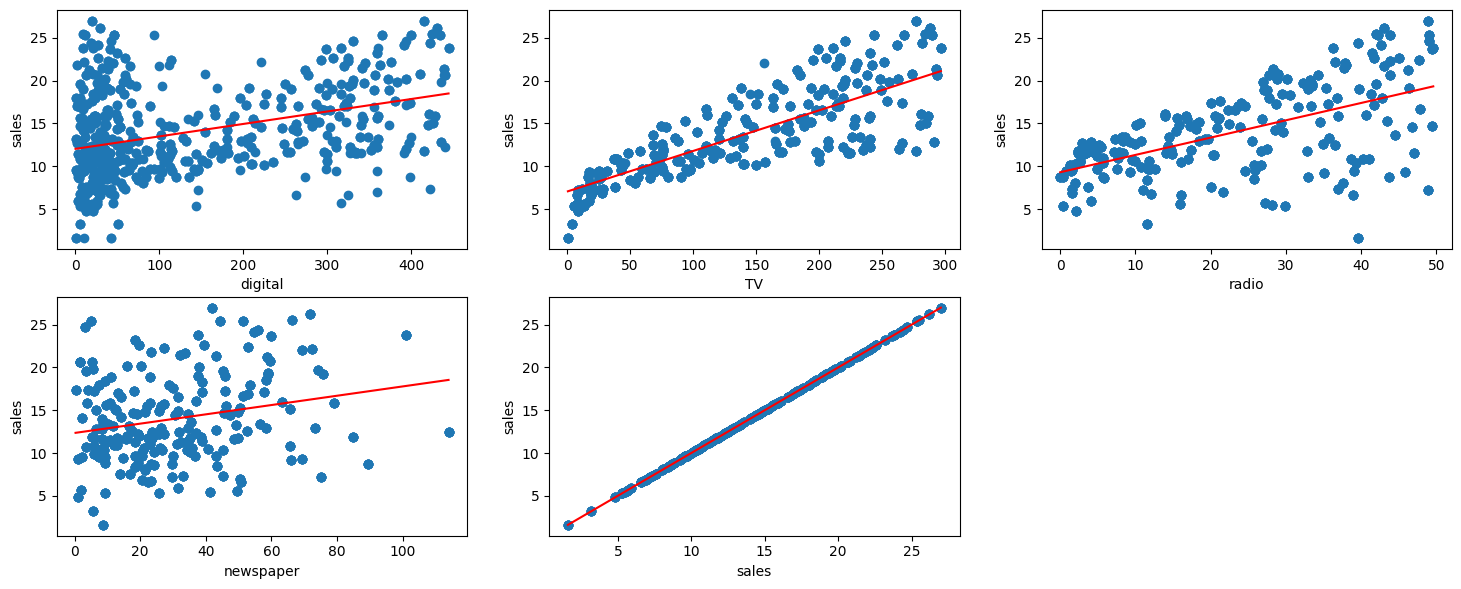

In [29]:
'''=== Show the linear relationship between features  and sales Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label


Concluding results after observing the Graph
The relation bw TV and Sales is stong and increases in linear fashion
The relation bw Radio and Sales is less stong
The relation bw TV and Sales is weak

Text(0.5, 1.0, 'Digital vs. radio')

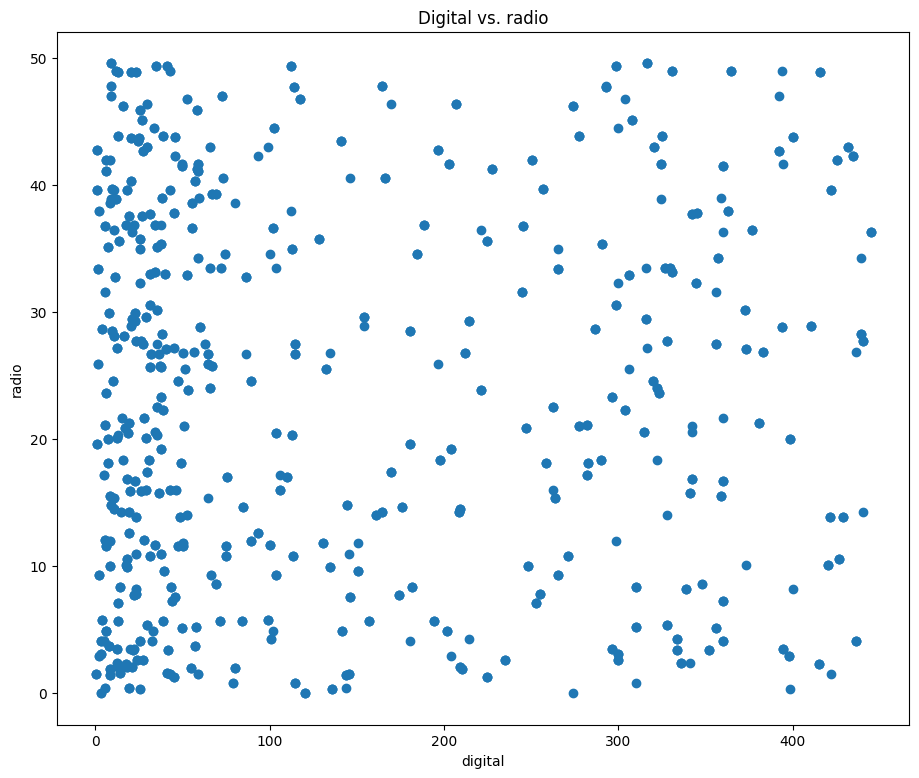

In [30]:
### Visualize the relationship using scatterplot - Use this to test colinearity.

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising_df["digital"], advertising_df["radio"])
plt.xlabel("digital")
plt.ylabel("radio")
plt.title("Digital vs. radio")



## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

#### Data Preprocessing

##### Split: X (features) and y (target)
Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [31]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']



##### Scaling (Normalization)

In [32]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


##### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best pracices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ration


In [33]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [34]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2:  Build Network
Because so few samples are available, we will be using a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

#### Build and Train the Network

In [35]:
## Build Model
model = Sequential()
model.add(Dense(4,activation='relu'))       # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)



Epoch 1/32
23/23 [==============================] - 2s 11ms/step - loss: 209.0386 - mse: 209.0386 - val_loss: 188.7222 - val_mse: 188.7222
Epoch 2/32
23/23 [==============================] - 0s 4ms/step - loss: 163.8333 - mse: 163.8333 - val_loss: 150.7444 - val_mse: 150.7444
Epoch 3/32
23/23 [==============================] - 0s 5ms/step - loss: 138.4343 - mse: 138.4343 - val_loss: 132.2896 - val_mse: 132.2896
Epoch 4/32
23/23 [==============================] - 0s 6ms/step - loss: 125.9311 - mse: 125.9311 - val_loss: 122.8155 - val_mse: 122.8155
Epoch 5/32
23/23 [==============================] - 0s 4ms/step - loss: 118.3077 - mse: 118.3077 - val_loss: 116.5075 - val_mse: 116.5075
Epoch 6/32
23/23 [==============================] - 0s 4ms/step - loss: 113.3133 - mse: 113.3133 - val_loss: 113.2034 - val_mse: 113.2034
Epoch 7/32
23/23 [==============================] - 0s 4ms/step - loss: 110.6217 - mse: 110.6217 - val_loss: 111.0725 - val_mse: 111.0725
Epoch 8/32
23/23 [===============

#### Model Summary
Once we've run data through the model, we can call .summary() on the model to get a high-level summary of our network.

In [36]:
#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.evaluate(X_test, y_test)[1]

15/15 [==============================] - 0s 2ms/step - loss: 5.2212 - mse: 5.2212


5.221218585968018

### Visualization

Running .fit (or .fit_generator) returns a History object which collects all the events recorded during training. You can plot the training and validation curves for the model loss and mse by accessing these elements of the History object.

<Axes: >

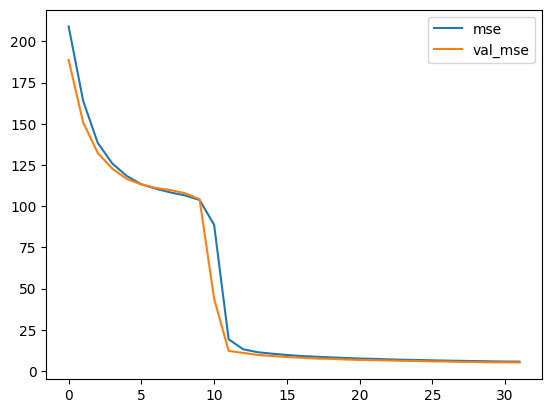

In [38]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot()

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

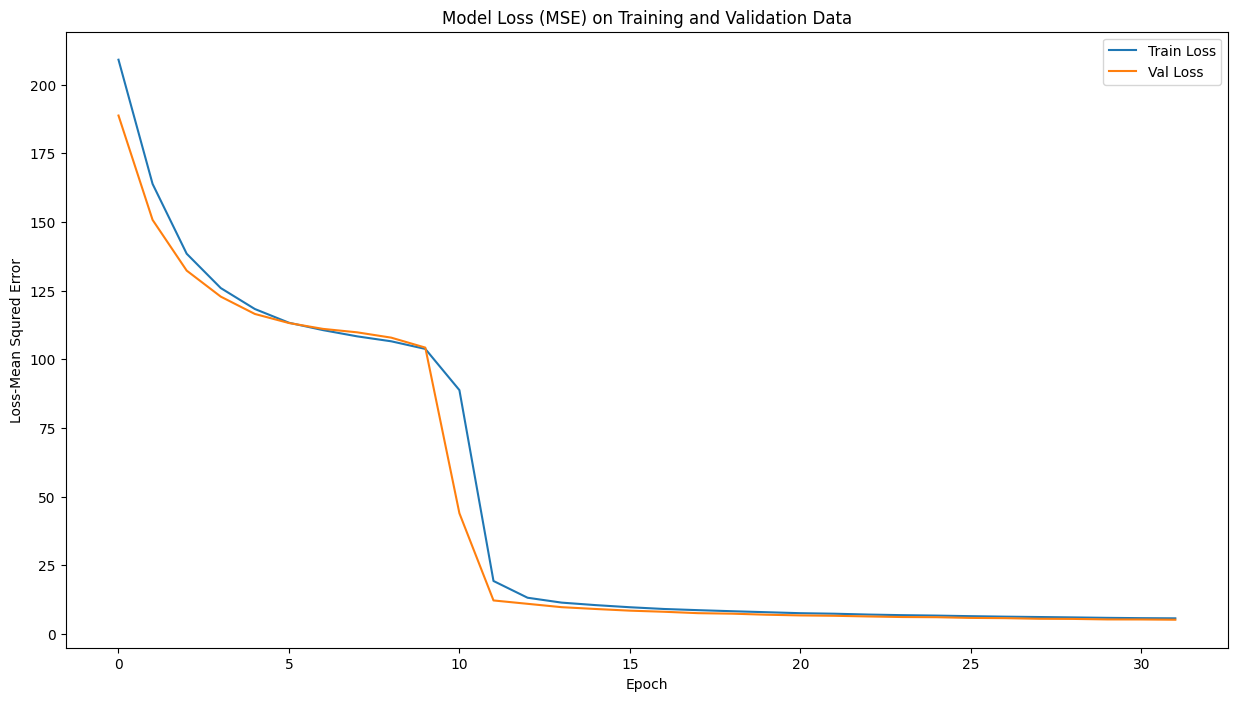

In [39]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.show()


### Predict Sales

In [40]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 [==============================] - 0s 1ms/step
[24.965025  16.198559  17.203419  21.356468  16.10486   25.982304
 11.275483  18.024426  17.166964  13.38503    5.627617  16.390688
  5.1993732  7.8908505 10.803741   6.891423  21.650991  14.732409
  3.958511  16.344847  21.135324   6.871425  11.7027855 12.656596
  9.237592   2.9814894 13.807676  18.687735  12.924266  10.714363
 14.544932  13.820222  18.792091  16.49655   17.31317   16.92546
 23.47307   18.065563  14.303247  15.326896  16.146488  13.504146
  7.4366446 13.855028  13.62464   12.641733   6.651081  23.47307
 13.192089   8.439207   9.354826  10.803741  11.19894   15.13483
  4.1294584 18.586262  15.093111  20.88006   10.492847  14.583656
 10.886523  12.235328  10.792764  14.728284  10.114377   9.523323
 11.235287  20.57512    7.1700544 22.317024   5.7756433 20.591913
  8.623513  18.548805  14.207891  15.6131315 17.287142  11.984107
 13.820225  23.27407   15.368685  19.347221  17.241648  18.352201
 14.796096  16.699596  12.

### True and Predicted Values

In [41]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,24.965025
1,19.0,16.198559
2,12.8,17.203419
3,20.8,21.356468
4,16.9,16.104860
5,23.8,25.982304


Visualize the preditction.

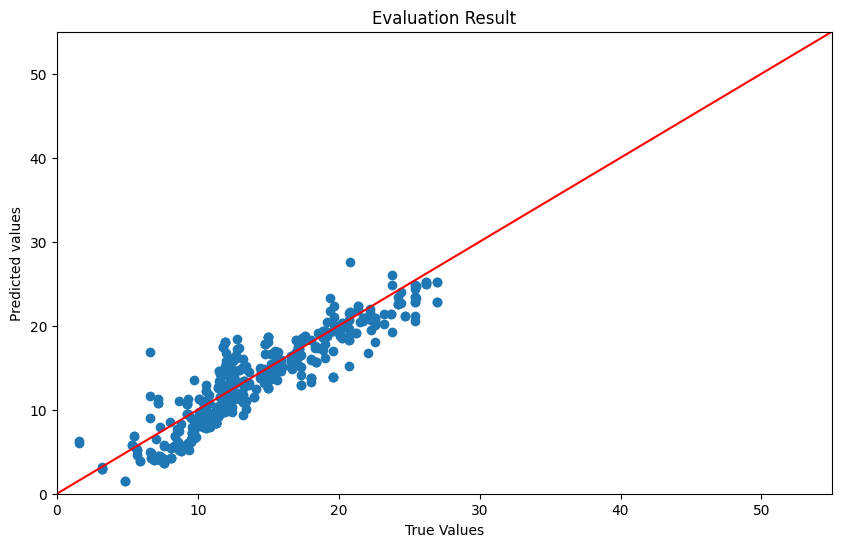

In [42]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

Show the accuracy of Linear Regression on the dataset. The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

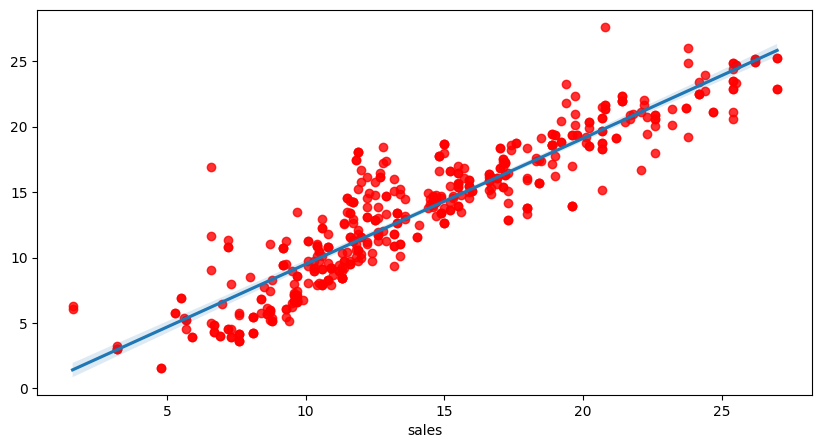

In [43]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

### Evaluation

Step 6 - Predict on the Test Data and Compute Evaluation Metrics
The first line of code predicts on the train data, while the second line prints the RMSE value on the train data. The same is repeated in the third and fourth lines of code which predicts and prints the RMSE value on test data.

In [44]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 [==============================] - 0s 1ms/step
2.3676376465038453
15/15 [==============================] - 0s 2ms/step
2.284998557108063


### Export File to CSV

In [45]:
# Create Directory to store training and test files

if not os.path.isdir("../data"):
    os.makedirs("../data")


In [46]:
train.to_csv('../data/housing-train.csv', encoding='utf-8', index=False)
test.to_csv('../data/housing-test.csv', encoding='utf-8', index=False)

NameError: ignored

In [ ]:
!head ../data/housing*.csv

Evaluation of the Model Performance
The output above shows that the RMSE, which is our evaluation metric, was 3.784 thousand for train data and 3.750 thousand for test data. Ideally, the lower the RMSE value, the better the model performance. However, in contrast to accuracy, it is not straightforward to interpret RMSE as we would have to look at the unit which in our case is in thousands.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

In [ ]:
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

In [ ]:
# EXAMPLES
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# lets see the linear relation separately
sns.pairplot(advertising_df, size=2.5, kind='reg');